### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [ ]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed hence this will not work
f.write('hello')

ValueError: ignored

In [ ]:
# write multiline strings
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

In [ ]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('salman khan')
f.close()

In [ ]:
# how exactly open() works?

In [ ]:
# Problem with w mode
# introducing append mode
f = open('/content/sample1.txt','a')
f.write('\nI am fine')
f.close()

In [ ]:
# write lines
L = ['hello\n','hi\n','how are you\n','I am fine']

f = open('/content/temp/sample.txt','w')
f.writelines(L)
f.close()

In [ ]:
# reading from files
# -> using read()
f = open('/content/sample.txt','r')
s = f.read()
print(s)
f.close()

hello
hi
how are you
I am fine


In [ ]:
# reading upto n chars
f = open('/content/sample.txt','r')
s = f.read(10)
print(s)
f.close()

hello
hi
h


In [ ]:
# readline() -> to read line by line
f = open('/content/sample.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

hello
hi


In [ ]:
# reading entire using readline
f = open('/content/sample.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

hello
hi
how are you
I am fine

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [ ]:
# with
with open('/content/sample1.txt','w') as f:
  f.write('selmon bhai')

In [ ]:
f.write('hello')

ValueError: ignored

In [ ]:
# try f.read() now
with open('/content/sample.txt','r') as f:
  print(f.readline())

hello



In [ ]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))

hello
hi
h
ow are you

I am fine



In [ ]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [ ]:
with open('big.txt','r') as f:

  chunk_size = 10

  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='***')
    f.read(chunk_size)

d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo**

In [ ]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15)
  print(f.read(10))
  print(f.tell())

  print(f.read(10))
  print(f.tell())

e you
I am
25
 fine
30


In [ ]:
# seek during write
with open('sample.txt','w') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xa')

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [ ]:
# working with binary file
with open('screenshot1.png','r') as f:
  f.read()

UnicodeDecodeError: ignored

In [ ]:
# working with binary file
with open('screenshot1.png','rb') as f:
  with open('screenshot_copy.png','wb') as wf:
    wf.write(f.read())

In [ ]:
# working with a big binary file

In [ ]:
# working with other data types
with open('sample.txt','w') as f:
  f.write(5)

TypeError: ignored

In [ ]:
with open('sample.txt','w') as f:
  f.write('5')

In [ ]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

10


In [ ]:
# more complex data
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

In [ ]:
with open('sample.txt','r') as f:
  print(dict(f.read()))

ValueError: ignored

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


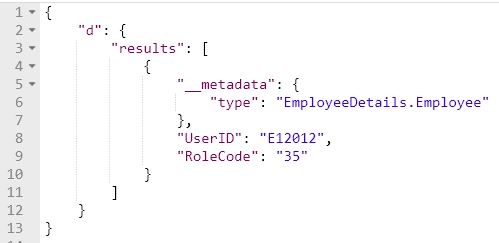

In [ ]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f)


In [ ]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

In [ ]:
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [ ]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)

In [ ]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
  json.dump(d,f)

### Serializing and Deserializing custom objects

In [ ]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [ ]:
person = Person('Nitish','Singh',33,'male')

In [ ]:
# As a string
import json

def show_object(person):
  if isinstance(person,Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object)

In [ ]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [ ]:
# indent arrtribute
# As a dict

In [ ]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [ ]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [ ]:
p = Person('nitish',33)


In [ ]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)

In [ ]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.